# XGBoost Tutorial: Classification and Regression

## What is XGBoost?

XGBoost (eXtreme Gradient Boosting) is a powerful machine learning algorithm that:
- Uses decision trees as base learners
- Builds trees sequentially, each learning from previous trees' mistakes
- Is highly efficient and often wins machine learning competitions

## Classification vs Regression

- **Classification**: Predicting discrete categories (e.g., is this email spam or not?)
- **Regression**: Predicting continuous values (e.g., what will the house price be?)

Let's explore both with hands-on examples!

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Part 1: Classification with XGBoost

We'll use the famous Iris dataset - classifying flowers based on their measurements.

In [2]:
# Load the Iris dataset
iris = load_iris()
X_class = iris.data
y_class = iris.target

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X_class, columns=iris.feature_names)
iris_df['species'] = y_class
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", iris_df.shape)
print("\nFirst 5 rows:")
iris_df.head()

Dataset shape: (150, 6)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


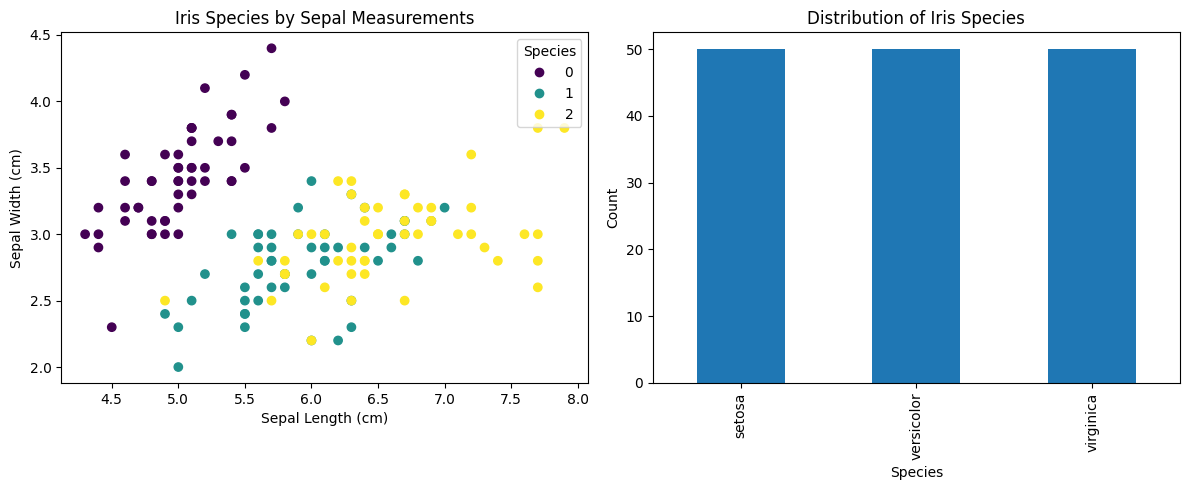

In [3]:
# Visualize the data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of two features
scatter = axes[0].scatter(iris_df['sepal length (cm)'], 
                         iris_df['sepal width (cm)'], 
                         c=y_class, cmap='viridis')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].set_title('Iris Species by Sepal Measurements')
axes[0].legend(*scatter.legend_elements(), title="Species")

# Distribution of species
iris_df['species_name'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of Iris Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [4]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print(f"Training set size: {X_train_class.shape[0]}")
print(f"Test set size: {X_test_class.shape[0]}")

Training set size: 120
Test set size: 30


In [5]:
# Create and train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,      # Number of trees
    max_depth=3,           # Maximum tree depth
    learning_rate=0.1,     # Step size shrinkage
    objective='multi:softprob',  # For multi-class classification
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = xgb_classifier.predict(X_test_class)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=iris.target_names))

Classification Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



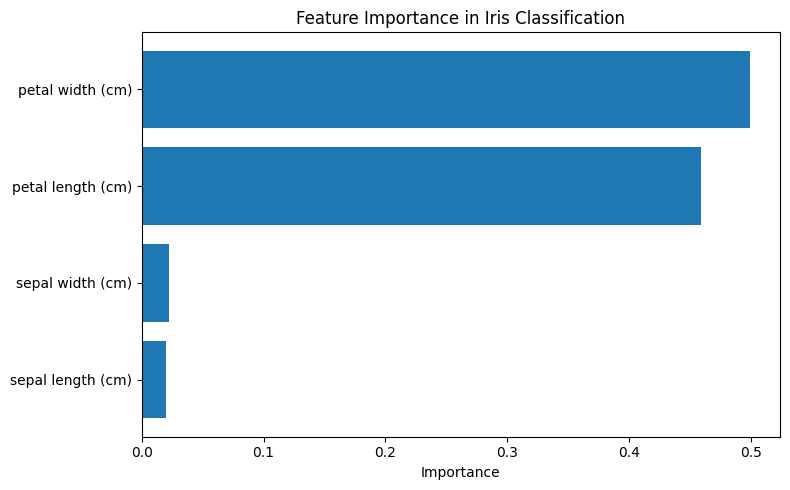

In [6]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': xgb_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Iris Classification')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Part 2: Regression with XGBoost

Now let's predict continuous values - we'll use the California Housing dataset to predict house prices.

In [7]:
# Load California Housing dataset
housing = fetch_california_housing()
X_reg = housing.data
y_reg = housing.target

# Create DataFrame for visualization
housing_df = pd.DataFrame(X_reg, columns=housing.feature_names)
housing_df['price'] = y_reg

print("Dataset shape:", housing_df.shape)
print("\nFeature names:", list(housing.feature_names))
print("\nTarget: Median house value in hundreds of thousands of dollars")
print("\nFirst 5 rows:")
housing_df.head()

Dataset shape: (20640, 9)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: Median house value in hundreds of thousands of dollars

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


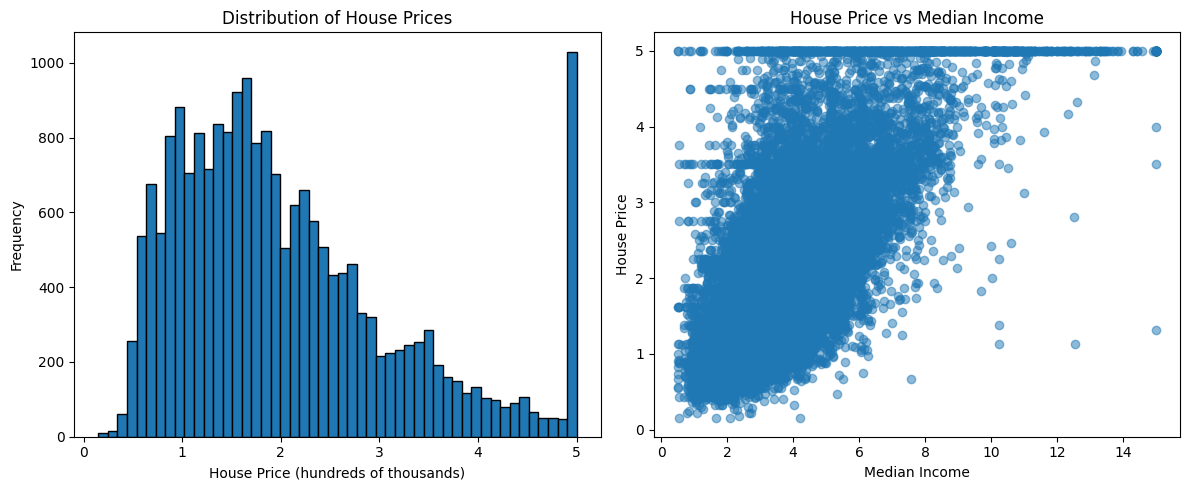

In [8]:
# Visualize the target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of house prices
axes[0].hist(y_reg, bins=50, edgecolor='black')
axes[0].set_xlabel('House Price (hundreds of thousands)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices')

# Scatter plot: House price vs Median Income
axes[1].scatter(housing_df['MedInc'], housing_df['price'], alpha=0.5)
axes[1].set_xlabel('Median Income')
axes[1].set_ylabel('House Price')
axes[1].set_title('House Price vs Median Income')

plt.tight_layout()
plt.show()

In [9]:
# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_reg.shape[0]}")
print(f"Test set size: {X_test_reg.shape[0]}")

Training set size: 16512
Test set size: 4128


In [10]:
# Create and train XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',  # For regression
    random_state=42
)

# Train the model
xgb_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = xgb_regressor.predict(X_test_reg)

# Calculate metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.2436
Root Mean Squared Error: 0.4936
R² Score: 0.8141


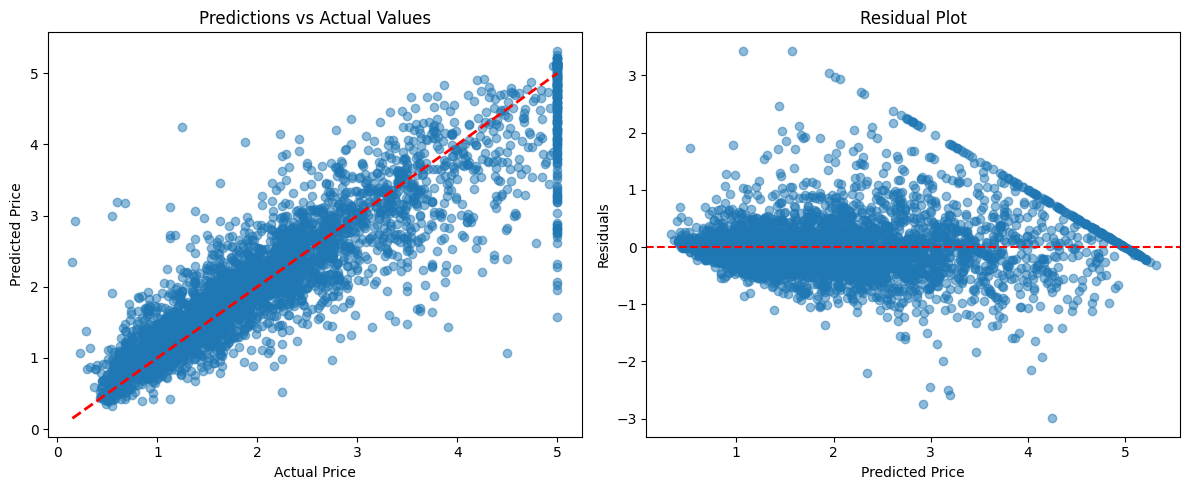

In [11]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of predictions vs actual
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Predictions vs Actual Values')

# Residual plot
residuals = y_test_reg - y_pred_reg
axes[1].scatter(y_pred_reg, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

plt.tight_layout()
plt.show()

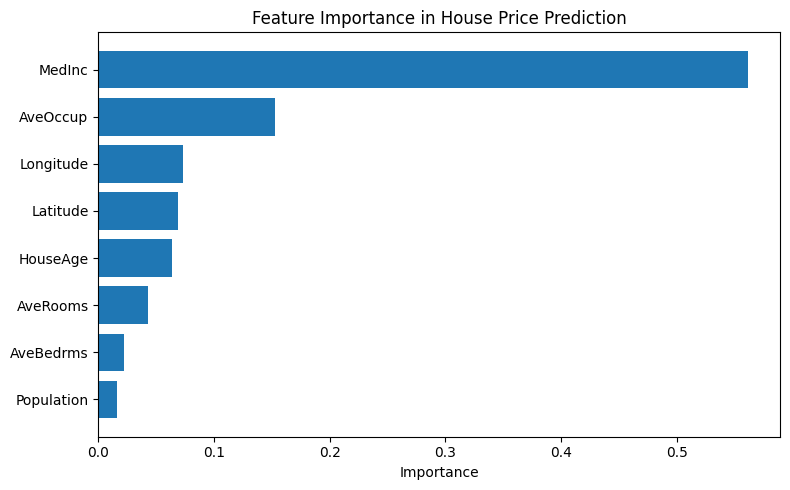

In [12]:
# Feature importance for regression
feature_importance_reg = pd.DataFrame({
    'feature': housing.feature_names,
    'importance': xgb_regressor.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importance_reg['feature'], feature_importance_reg['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in House Price Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Key Takeaways

### Classification:
- Predicts discrete categories (species of iris)
- Uses metrics like accuracy, precision, recall
- Output is a class label

### Regression:
- Predicts continuous values (house prices)
- Uses metrics like MSE, RMSE, R²
- Output is a numeric value

### XGBoost Advantages:
1. **High Performance**: Often achieves state-of-the-art results
2. **Feature Importance**: Shows which features matter most
3. **Handles Missing Data**: Built-in handling of missing values
4. **Regularization**: Prevents overfitting
5. **Parallel Processing**: Fast training

### When to Use XGBoost:
- Tabular/structured data
- When interpretability matters (feature importance)
- When you need high accuracy quickly
- Competition scenarios

## Exercises

Try these to deepen your understanding:

1. **Hyperparameter Tuning**: Try different values for `n_estimators`, `max_depth`, and `learning_rate`
2. **Cross-Validation**: Use `cross_val_score` to get more robust performance estimates
3. **Early Stopping**: Implement early stopping to prevent overfitting
4. **Different Datasets**: Try XGBoost on other sklearn datasets